In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ConcreteStrengthData.csv'

df = pd.read_csv(file_path, encoding='utf-8')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Розділяємо ознаки (X) та цільову змінну (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Розділяємо дані на навчальний (80%) і тестовий (20%) набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Нормалізуємо ознаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)

Форма X_train: (824, 8)
Форма X_test: (206, 8)


In [3]:
import torch
import torch.nn as nn

# Створюємо клас нейромережі
class ConcreteStrengthNN(nn.Module):
    def __init__(self):
        super(ConcreteStrengthNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Створюємо екземпляр моделі
model = ConcreteStrengthNN()

In [34]:
# # Adam
# import torch.optim as optim

# # Функція втрат
# criterion = nn.MSELoss()

# # Оптимізатор
# optimizer = optim.Adam(model.parameters(), lr=0.1e-4)

# # Гіперпараметри
# learning_rate = 0.1e-4
# batch_size = 200
# num_epochs = 100

# print("Налаштування завершено. Готові до навчання!")

Налаштування завершено. Готові до навчання!


In [30]:
# SGD
import torch.optim as optim

# Функція втрат
criterion = nn.MSELoss()

# Оптимізатор
optimizer = optim.SGD(model.parameters(), lr=0.1e-4)

# Гіперпараметри
learning_rate = 0.1e-4
batch_size = 200
num_epochs = 100

print("Налаштування завершено. Готові до навчання!")

Налаштування завершено. Готові до навчання!


Епоха 10/100, Втрата: 6.6638
Епоха 20/100, Втрата: 9.1811
Епоха 30/100, Втрата: 7.2212
Епоха 40/100, Втрата: 7.1227
Епоха 50/100, Втрата: 7.0482
Епоха 60/100, Втрата: 6.8314
Епоха 70/100, Втрата: 6.7028
Епоха 80/100, Втрата: 7.2245
Епоха 90/100, Втрата: 7.3908
Епоха 100/100, Втрата: 7.8428
Навчання завершено!


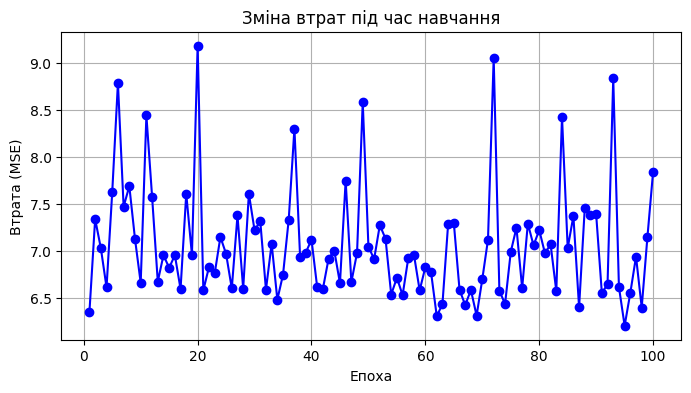

In [48]:
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Перетворюємо дані у тензори
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

# Створюємо DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

losses = []

# Цикл навчання
for epoch in range(num_epochs):
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    losses.append(total_loss / len(train_loader))

    # Виводимо прогрес навчання кожні 10 епох
    if (epoch + 1) % 10 == 0:
        print(f"Епоха {epoch+1}/{num_epochs}, Втрата: {total_loss / len(train_loader):.4f}")

print("Навчання завершено!")

# Графік втрат
plt.figure(figsize=(8, 4))
plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.xlabel("Епоха")
plt.ylabel("Втрата (MSE)")
plt.title("Зміна втрат під час навчання")
plt.grid()
plt.show()


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Перетворюємо тестові дані у тензори
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Прогнозуємо на тестовому наборі. Переводимо модель у режим оцінки
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

# Перетворюємо назад у NumPy
y_pred = y_pred_tensor.numpy()
y_test = y_test_tensor.numpy()

# Обчислюємо метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Виводимо результати
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 31.9862
MAE: 3.9228
R²: 0.8759


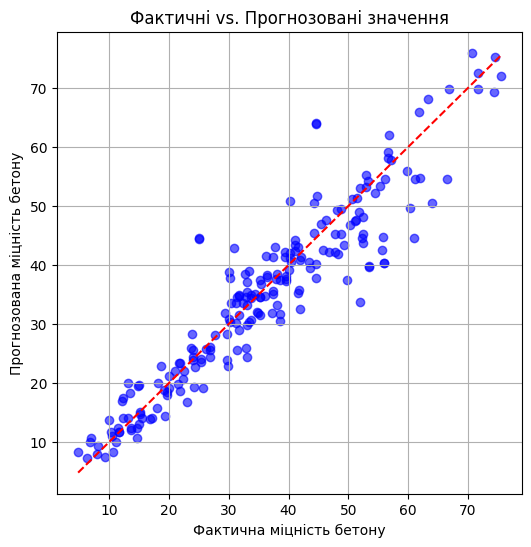

In [47]:
import matplotlib.pyplot as plt

# Графік: Фактичні vs. Прогнозовані значення

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Лінія ідеального прогнозу
plt.xlabel("Фактична міцність бетону")
plt.ylabel("Прогнозована міцність бетону")
plt.title("Фактичні vs. Прогнозовані значення")
plt.grid()
plt.show()


# Висновки щодо навчання моделі

1. Оцінка точності моделі

  MSE = 31.9862 → середня квадратична помилка.

  MAE = 3.9228 → в середньому модель помиляється на ≈3.9 одиниці міцності бетону, що є непоганим результатом.

  R² = 0.8759 → модель пояснює ≈ 87.6% варіації в даних, що вказує на хорошу відповідність.

2. Вплив збільшення кількості епох
  Навіть після 200 епох втрата (MSE) не покращилась, що може вказувати на плато в навчанні.
Можливо, оптимізація градієнта вийшла на стабільний рівень, і подальше навчання не приносить користі.
3. При використанны Adam-оптимызатора втрати були трохи вище ніж при SGD, тому я вирішив зупинитися на SGB.
4. Зменшення швидкості навчання трохи покращило результат.

# Загальний висновок

Модель має хорошу якість прогнозування (R² ≈ 0.87).

Подальше збільшення епох не покращує результати. SGB оптимізатор показав трохи кращі результати ніж Adam. Зменшення швидкости навчання з 0.01 до 0.1е-4 трохи покращило результати.
Для досягнення ще кращих результатів можна протестувати інші методи нейромережевого навчання або алгоритми машинного навчання (наприклад, градієнтний бустинг).
